In [1]:
import pandas as pd


In [36]:
flights = pd.read_csv('flights.csv')
flights.head()

,Month,Day,Weekday,Airline,Origin,Dest,AirTime,Distance,ArrivalDelay,Diverted,Cancelled
0,1,1,4,WN,LAX,SLC,94.0,590,65.0,0,0
1,1,1,4,UA,DEN,IAD,154.0,1452,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,85.0,641,35.0,0,0
3,1,1,4,AA,DFW,DCA,126.0,1192,-7.0,0,0
4,1,1,4,WN,LAX,MCI,166.0,1363,39.0,0,0


In [15]:
flights.loc[:,['Month','Day','ArrivalDelay']][flights.ArrivalDelay == flights.ArrivalDelay.max()]

,Month,Day,ArrivalDelay
58188,12,30,1185.0


In [16]:
flights.loc[flights.ArrivalDelay == flights.ArrivalDelay.max(),['Month','Day','ArrivalDelay']]

,Month,Day,ArrivalDelay
58188,12,30,1185.0


In [21]:
flights.ArrivalDelay.sort_values(ascending = False).head(3)

58188    1185.0
32218     858.0
5540      839.0
Name: ArrivalDelay, dtype: float64

In [25]:
flights.sort_values(by='ArrivalDelay',ascending = False).head(3)['Airline']

58188    UA
32218    AA
5540     F9
Name: Airline, dtype: object

In [110]:
flights.groupby(['Airline']).ArrivalDelay.max().sort_values().tail(3)


Airline
F9     839.0
AA     858.0
UA    1185.0
Name: ArrivalDelay, dtype: float64

In [42]:
flights['c_d'] = flights.Cancelled + flights.Diverted
flights.groupby(['Airline']).c_d.sum().sort_values().tail(3)



Airline
EV    161
OO    163
AA    180
Name: c_d, dtype: int64

In [68]:
can_by_airline = flights.groupby(['Airline']).Cancelled.sum()
#print(can_by_airline)

fli_by_airline =  flights.groupby(['Airline']).Airline.count()
#print(fli_by_airline)

df = pd.concat([can_by_airline, fli_by_airline], axis=1)
df['per'] = (df.Cancelled/df.Airline) * 100
df[df['per'] > 2]


,Cancelled,Airline,per
Airline,,,
EV,146,5858,2.492318
MQ,152,3471,4.379141
OO,142,6588,2.155434


In [69]:
flights.head()

,Month,Day,Weekday,Airline,Origin,Dest,AirTime,Distance,ArrivalDelay,Diverted,Cancelled,c_d
0,1,1,4,WN,LAX,SLC,94.0,590,65.0,0,0,0
1,1,1,4,UA,DEN,IAD,154.0,1452,-13.0,0,0,0
2,1,1,4,MQ,DFW,VPS,85.0,641,35.0,0,0,0
3,1,1,4,AA,DFW,DCA,126.0,1192,-7.0,0,0,0
4,1,1,4,WN,LAX,MCI,166.0,1363,39.0,0,0,0


In [93]:
flights.sort_values(['Origin','Dest'])[(flights.Origin=='ATL') & (flights.Dest=='ABE')].AirTime.mean()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


96.38709677419355

In [82]:
flights.groupby(['Origin','Dest']).AirTime.mean()

(Origin  Dest
 ATL     ABE      96.387097
         ABQ     170.500000
         ABY      28.578947
         ACY      91.333333
         AEX      78.725000
                    ...    
 SFO     SNA      64.059322
         STL     198.900000
         SUN      78.000000
         TUS     100.200000
         XNA     173.500000
 Name: AirTime, Length: 1130, dtype: float64,
 <bound method GroupBy.var of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001ECAC999848>>)

In [95]:
flights.groupby(['Origin','Dest']).AirTime.var()

Origin  Dest
ATL     ABE      45.778495
        ABQ      87.866667
        ABY       6.590643
        ACY      11.466667
        AEX      47.332692
                   ...    
SFO     SNA      11.338331
        STL     101.042105
        SUN      25.777778
        TUS      35.221053
        XNA       0.500000
Name: AirTime, Length: 1130, dtype: float64

In [97]:
flights.head()

,Month,Day,Weekday,Airline,Origin,Dest,AirTime,Distance,ArrivalDelay,Diverted,Cancelled,c_d
0,1,1,4,WN,LAX,SLC,94.0,590,65.0,0,0,0
1,1,1,4,UA,DEN,IAD,154.0,1452,-13.0,0,0,0
2,1,1,4,MQ,DFW,VPS,85.0,641,35.0,0,0,0
3,1,1,4,AA,DFW,DCA,126.0,1192,-7.0,0,0,0
4,1,1,4,WN,LAX,MCI,166.0,1363,39.0,0,0,0


In [108]:
flights[(flights.Distance > 500) & (flights.Distance < 1000)].groupby(['Airline']).Airline.count().idxmax()

'DL'

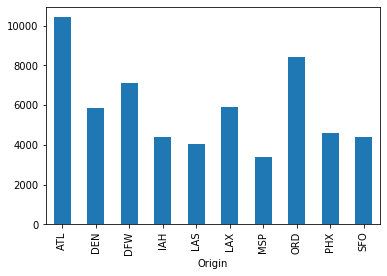

In [119]:
import matplotlib.pyplot as plt
ser = flights.groupby('Origin').size()
ser.plot.bar();

In [125]:
def x(num):
    d = {
        1: 'Sun',
        2: 'M',
        3: 'Tue',
        4: 'W',
        5: 'T',
        6: 'F',
        7: 'S'
        }
    
    return d.get(num)

flights.Weekday.apply(x)[flights.Weekday != 4]


136        T
137        T
138        T
139        T
140        T
        ... 
58350    Tue
58351    Tue
58352    Tue
58353    Tue
58354    Tue
Name: Weekday, Length: 49833, dtype: object

In [126]:
flights

,Month,Day,Weekday,Airline,Origin,Dest,AirTime,Distance,ArrivalDelay,Diverted,Cancelled,c_d
0,1,1,4,WN,LAX,SLC,94.0,590,65.0,0,0,0
1,1,1,4,UA,DEN,IAD,154.0,1452,-13.0,0,0,0
2,1,1,4,MQ,DFW,VPS,85.0,641,35.0,0,0,0
3,1,1,4,AA,DFW,DCA,126.0,1192,-7.0,0,0,0
4,1,1,4,WN,LAX,MCI,166.0,1363,39.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,166.0,1464,-19.0,0,0,0
58488,12,31,4,F9,LAS,SFO,71.0,414,4.0,0,0,0
58489,12,31,4,OO,SFO,SBA,46.0,262,-5.0,0,0,0
58490,12,31,4,WN,MSP,ATL,124.0,907,34.0,0,0,0


In [144]:
flights['date'] = flights.Month.apply(str) + '/' +  flights.Day.apply(str)
flights['date']

0          1/1
1          1/1
2          1/1
3          1/1
4          1/1
         ...  
58487    12/31
58488    12/31
58489    12/31
58490    12/31
58491    12/31
Name: date, Length: 58492, dtype: object

In [150]:
# def max_streak(s):
#     return (s >= 15).cumsum().value_counts().max() - 1
def max_streak(s):
    return (s >= 15).cumsum().value_counts().max() - 1
flights.groupby('Airline')['ArrivalDelay'].agg(max_streak)

50
48
25
91
42
22
17
51
24
36
46
44
38
43


Airline
AA    50.0
AS    48.0
B6    25.0
DL    91.0
EV    42.0
F9    22.0
HA    17.0
MQ    51.0
NK    24.0
OO    36.0
UA    46.0
US    44.0
VX    38.0
WN    43.0
Name: ArrivalDelay, dtype: float64

In [154]:
(flights.loc[flights.Airline == "AA", 'ArrivalDelay'] >= 15).cumsum()

3           0
6           1
8           1
15          1
26          2
         ... 
58470    1774
58475    1774
58476    1774
58479    1774
58487    1774
Name: ArrivalDelay, Length: 8900, dtype: int32